In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
dataset = pd.read_csv('/content/drive/My Drive/data/Mall_Customers.csv')
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [12]:
dataset.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [18]:
X = dataset.iloc[:, 3:].values

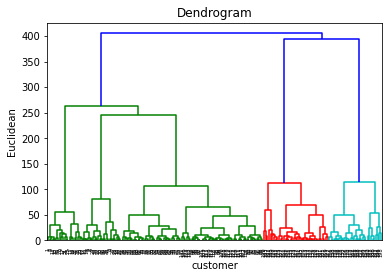

In [24]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X , method='ward'))
plt.title('Dendrogram')
plt.xlabel('customer')
plt.ylabel('Euclidean')
plt.show()

In [20]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5 , affinity='euclidean' , linkage='ward')
y_hc = hc.fit_predict(X)

In [21]:
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

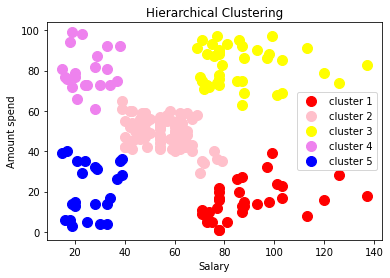

In [22]:
plt.scatter(X[y_hc==0 , 0] , X[y_hc==0 , 1] , s=100 , c='red' , label='cluster 1')
plt.scatter(X[y_hc==1 , 0] , X[y_hc==1 , 1] , s=100 , c='pink' , label='cluster 2')
plt.scatter(X[y_hc==2 , 0] , X[y_hc==2 , 1] , s=100 , c='yellow' , label='cluster 3')
plt.scatter(X[y_hc==3 , 0] , X[y_hc==3 , 1] , s=100 , c='violet' , label='cluster 4')
plt.scatter(X[y_hc==4 , 0] , X[y_hc==4 , 1] , s=100 , c='blue' , label='cluster 5')
plt.xlabel('Salary')
plt.ylabel('Amount spend')
plt.title('Hierarchical Clustering')
plt.legend()
plt.show()